In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

import warnings
warnings.filterwarnings('ignore')

In [2]:
mouse_drug_data_to_load = "HW_5/mouse_drug_data.csv"
clinical_trial_data_to_load = "HW_5/clinicaltrial_data.csv"

mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

PY_data = mouse_data.merge(clinical_data, how='inner', on='Mouse ID') 
PY_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [4]:
cols = ['Mouse ID', 'Drug', 'Timepoint', 'Tumor Volume (mm3)']
no_MS = PY_data[cols]
MTV = no_MS.groupby(['Drug', 'Timepoint']).mean()
mean_df = pd.DataFrame(data=MTV)
mean_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [5]:
cols2 = ['Drug', 'Timepoint', 'Tumor Volume (mm3)']
no_MS_ID = PY_data[cols2]
TV_se = no_MS_ID.groupby(['Drug', 'Timepoint']).sem()
se_df = pd.DataFrame(data=TV_se)
se_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [6]:
capomulin_data = mean_df.loc['Capomulin']
infubinol_data = mean_df.loc['Infubinol']
ketapril_data = mean_df.loc['Ketapril']
placebo_data = mean_df.loc['Placebo']

capomulin_err = se_df.loc['Capomulin']
capomulin_err2 = capomulin_err.reset_index()
c_x = capomulin_err2.Timepoint
c_bar = capomulin_err2['Tumor Volume (mm3)']

infu_err = se_df.loc['Infubinol']
infu_err2 = infu_err.reset_index()
i_x = infu_err2.Timepoint
i_bar = infu_err2['Tumor Volume (mm3)']

keta_err = se_df.loc['Ketapril']
keta_err2 = keta_err.reset_index()
k_x = keta_err2.Timepoint
k_bar = keta_err2['Tumor Volume (mm3)']

plac_err = se_df.loc['Placebo']
plac_err2 = plac_err.reset_index()
p_x = plac_err2.Timepoint
p_bar = plac_err2['Tumor Volume (mm3)']

In [7]:
capomulin_bar = mean_df.loc['Capomulin']['Tumor Volume (mm3)']
infubinol_bar = mean_df.loc['Infubinol']['Tumor Volume (mm3)']
ketapril_bar = mean_df.loc['Ketapril']['Tumor Volume (mm3)']
placebo_bar = mean_df.loc['Placebo']['Tumor Volume (mm3)']
barred = pd.pivot_table(se_df, index='Timepoint', columns='Drug')
barred.head()

Tumor Volume (mm3)                                          \
Drug               Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   
Timepoint                                                              
0                   0.000000  0.000000  0.000000  0.000000  0.000000   
5                   0.448593  0.164505  0.235102  0.264819  0.202385   
10                  0.702684  0.236144  0.282346  0.357421  0.319415   
15                  0.838617  0.332053  0.357705  0.580268  0.444378   
20                  0.909731  0.359482  0.476210  0.726484  0.595260   

                                                             
Drug        Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                    
0          0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.218091  0.231708  0.482955  0.239862  0.188950  
10         0.402064  0.376195  0.720225  0.433678  0.263949  
15         0.614461  0.466109  0.770432  0.493261  0.370544  
20         0.839609  0.555181  0.786199  0.621889  0.533182

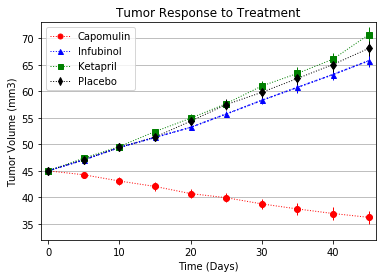

In [8]:
plt.xlim(-1, 46)
plt.ylim(32, 73)

capomulin_line = plt.plot(capomulin_data, ':or', linewidth=1, markersize=5, label="Capomulin")
infubinol_line = plt.plot(infubinol_data, '^b:', linewidth=1, markersize=5, label="Infubinol")
ketapril_line = plt.plot(ketapril_data, ':sg', linewidth=1, markersize=5, label="Ketapril")
placebo_line = plt.plot(placebo_data, ':dk', linewidth=1, markersize=5, label="Placebo")

capo_bar = plt.errorbar(c_x, capomulin_bar, yerr=c_bar, fmt='or', elinewidth=1)
infu_bar = plt.errorbar(i_x, infubinol_bar, yerr=i_bar, fmt=':b', elinewidth=1)
keta_bar = plt.errorbar(k_x, ketapril_bar, yerr=k_bar, fmt='sg', elinewidth=1)
plac_bar = plt.errorbar(p_x, placebo_bar, yerr=p_bar, fmt='dk', elinewidth=1)

ax2 = plt.axes()        
ax2.yaxis.grid() # horizontal lines

plt.title('Tumor Response to Treatment')
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend()

plt.show()

In [9]:
cols3 = ['Drug', 'Timepoint', 'Metastatic Sites']
MS_data = PY_data[cols3]
MS_mean = MS_data.groupby(['Drug', 'Timepoint']).mean()
MS_df = pd.DataFrame(data=MS_mean)
MS_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
MS_sem = MS_data.groupby(['Drug', 'Timepoint']).sem()
MS_se = pd.DataFrame(data=MS_sem)
MS_se.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
capo_MS = MS_df.loc['Capomulin']
infu_MS = MS_df.loc['Infubinol']
keta_MS = MS_df.loc['Ketapril']
plac_MS = MS_df.loc['Placebo']

c_err = MS_se.loc['Capomulin']
c_err2 = c_err.reset_index()
cap_x = c_err2.Timepoint
cap_bar = c_err2['Metastatic Sites']

i_err = MS_se.loc['Infubinol']
i_err2 = i_err.reset_index()
infu_x = i_err2.Timepoint
infu_bar = i_err2['Metastatic Sites']

k_err = MS_se.loc['Ketapril']
k_err2 = k_err.reset_index()
keta_x = k_err2.Timepoint
keta_bar = k_err2['Metastatic Sites']

p_err = MS_se.loc['Placebo']
p_err2 = p_err.reset_index()
plac_x = p_err2.Timepoint
plac_bar = p_err2['Metastatic Sites']

capo_y = MS_df.loc['Capomulin']['Metastatic Sites']
infu_y = MS_df.loc['Infubinol']['Metastatic Sites']
keta_y = MS_df.loc['Ketapril']['Metastatic Sites']
place_y = MS_df.loc['Placebo']['Metastatic Sites']
bar_pivot = pd.pivot_table(se_df, index='Timepoint', columns='Drug')
bar_pivot.head()

Tumor Volume (mm3)                                          \
Drug               Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   
Timepoint                                                              
0                   0.000000  0.000000  0.000000  0.000000  0.000000   
5                   0.448593  0.164505  0.235102  0.264819  0.202385   
10                  0.702684  0.236144  0.282346  0.357421  0.319415   
15                  0.838617  0.332053  0.357705  0.580268  0.444378   
20                  0.909731  0.359482  0.476210  0.726484  0.595260   

                                                             
Drug        Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                    
0          0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.218091  0.231708  0.482955  0.239862  0.188950  
10         0.402064  0.376195  0.720225  0.433678  0.263949  
15         0.614461  0.466109  0.770432  0.493261  0.370544  
20         0.839609  0.555181  0.786199  0.621889  0.533182

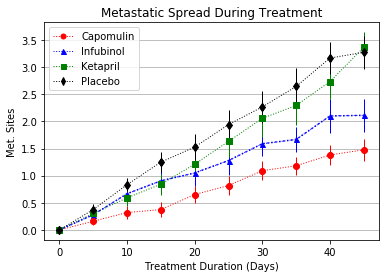

In [12]:
capo = plt.plot(capo_MS, ':or', linewidth=1, markersize=5, label="Capomulin")
infu = plt.plot(infu_MS, '^b:', linewidth=1, markersize=5, label="Infubinol")
keta = plt.plot(keta_MS, ':sg', linewidth=1, markersize=5, label="Ketapril")
place = plt.plot(plac_MS, ':dk', linewidth=1, markersize=5, label="Placebo")

capo_bar = plt.errorbar(cap_x, capo_y, yerr=cap_bar, fmt='or', elinewidth=1)
infu_bar = plt.errorbar(infu_x, infu_y, yerr=infu_bar, fmt=':b', elinewidth=1)
keta_bar = plt.errorbar(keta_x, keta_y, yerr=keta_bar, fmt='sg', elinewidth=1)
plac_bar = plt.errorbar(plac_x, place_y, yerr=plac_bar, fmt='dk', elinewidth=1)

ax2 = plt.axes()        
ax2.yaxis.grid() 

plt.title('Metastatic Spread During Treatment')
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.legend()

plt.show()

In [13]:
mice = len(PY_data['Mouse ID'])
cols4 = ['Drug', 'Timepoint', 'Mouse ID']
mice_data = PY_data[cols4]
mice_surv = mice_data.groupby(['Drug', 'Timepoint']).count()
mice_surv['Mouse ID'] = mice_surv['Mouse ID']/25
mice_surv.head()
surv_df = pd.DataFrame(data=mice_surv)
surv_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0              1.00
          5              1.00
          10             1.00
          15             0.96
          20             0.92

In [14]:
capo_surv = surv_df.loc['Capomulin']
infu_surv = surv_df.loc['Infubinol']
keta_surv = surv_df.loc['Ketapril']
plac_surv = surv_df.loc['Placebo']

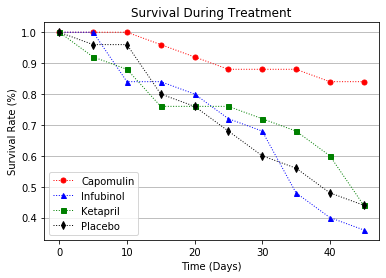

In [15]:
capo2 = plt.plot(capo_surv, ':or', linewidth=1, markersize=5, label="Capomulin")
infu2 = plt.plot(infu_surv, '^b:', linewidth=1, markersize=5, label="Infubinol")
keta2 = plt.plot(keta_surv, ':sg', linewidth=1, markersize=5, label="Ketapril")
place2 = plt.plot(plac_surv, ':dk', linewidth=1, markersize=5, label="Placebo")

ax2 = plt.axes()        
ax2.yaxis.grid() # horizontal lines

plt.title('Survival During Treatment')
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend()

plt.show()

In [16]:
cap_df = mean_df.loc['Capomulin']
infu_df = mean_df.loc['Infubinol']
keta_df = mean_df.loc['Ketapril']
plac_df = mean_df.loc['Placebo']
plac_df

cap_per = (((cap_df.iloc[9, 0])/(cap_df.iloc[0, 0]))-1)*100
infu_per = (((infu_df.iloc[9, 0])/(infu_df.iloc[0, 0]))-1)*100
keta_per = (((keta_df.iloc[9, 0])/(keta_df.iloc[0, 0]))-1)*100
plac_per = (((plac_df.iloc[9, 0])/(plac_df.iloc[0, 0]))-1)*100
arr_per = (cap_per, infu_per, keta_per, plac_per)
df_per = {cap_per, infu_per, keta_per, plac_per}

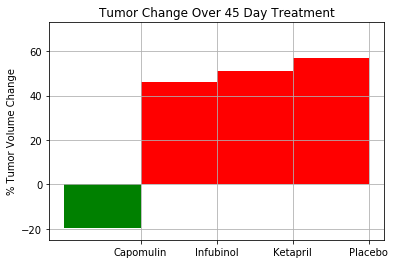

In [17]:
plt.ylim(-25, 73)

per_tup = ((-19.47530266789417, 46.12347172785187,51.29796048315151, 57.02879468660606))
d_pass = per_tup[0:1]
d_fail = per_tup[1:4]
y=('Capomulin', 'Infubinol', 'Ketapril', 'Placebo')
 
plt.bar(y, height = per_tup, width=-1, color=['green', 'red', 'red', 'red'], align='edge')

ax2 = plt.axes()        
ax2.xaxis.grid() # horizontal lines
ax2.yaxis.grid()
#ax2.text(arr_per, y, str(arr_per), color='white', fontweight='bold')

plt.title('Tumor Change Over 45 Day Treatment')
plt.ylabel("% Tumor Volume Change")

plt.show()